In [146]:
import numpy as np
import pandas as pd

In [147]:
df = pd.read_csv('placement.csv')

In [148]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [150]:
df.shape

(100, 4)

In [151]:
df = df.iloc[:,1:]

In [152]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [153]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [154]:
import matplotlib.pyplot as plt


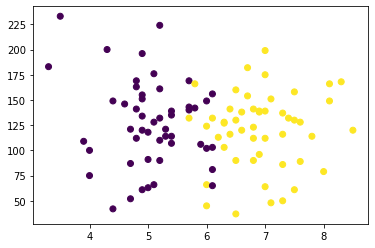

In [155]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [156]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [157]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [158]:
y.shape

(100,)

In [159]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [160]:
X_train

,cgpa,iq
73,4.9,61.0
41,5.4,114.0
40,4.9,134.0
15,5.1,176.0
86,5.1,128.0
...,...,...
70,6.3,127.0
64,7.0,64.0
7,5.0,63.0
94,4.7,52.0


In [161]:
y_train

73    0
41    0
40    0
15    0
86    0
     ..
70    1
64    1
7     0
94    0
76    0
Name: placement, Length: 90, dtype: int64

In [181]:
X_test

array([[ 0.97048983, -1.93619298],
       [-0.65810449, -0.88024009],
       [-1.00096645,  1.10595701],
       [ 1.14192082,  0.30142147],
       [ 0.11333493, -1.10651571],
       [ 0.28476591, -0.55339753],
       [ 0.11333493, -1.50878348],
       [-0.48667351,  0.251138  ],
       [ 0.79905885,  0.32656321],
       [ 0.71334336,  0.40198841]])

In [183]:
y_test

5     1
28    0
75    0
61    1
78    0
98    1
56    0
49    0
11    1
43    1
Name: placement, dtype: int64

In [163]:
from sklearn.preprocessing import StandardScaler

In [164]:
scaler = StandardScaler()

In [165]:
X_train = scaler.fit_transform(X_train)

In [166]:
X_train

array([[-0.91525096, -1.60935042],
       [-0.48667351, -0.27683844],
       [-0.91525096,  0.22599627],
       [-0.74381998,  1.28194916],
       [-0.74381998,  0.07514585],
       [-0.74381998, -1.48364174],
       [-1.77240587, -0.40254712],
       [ 0.71334336, -0.05056282],
       [ 0.02761944, -0.57853927],
       [-1.68669038, -1.25736613],
       [-0.14381155,  0.42713015],
       [ 1.14192082, -1.88590951],
       [-1.00096645,  0.40198841],
       [ 0.02761944, -1.48364174],
       [-1.08668194, -0.10084629],
       [ 0.02761944, -2.01161819],
       [ 1.82764474,  1.0305318 ],
       [ 0.02761944, -0.02542109],
       [ 0.45619689,  0.87968139],
       [ 1.57049827, -0.27683844],
       [-0.91525096, -0.12598803],
       [ 0.11333493, -0.55339753],
       [-0.65810449,  0.90482312],
       [ 0.19905042, -0.30198018],
       [-1.34382842, -2.08704339],
       [ 1.3133518 ,  0.82939792],
       [ 0.3704814 , -0.22655497],
       [ 0.71334336, -0.32712191],
       [ 0.54191238,

In [167]:
X_test = scaler.transform(X_test)

In [168]:
X_test

array([[ 0.97048983, -1.93619298],
       [-0.65810449, -0.88024009],
       [-1.00096645,  1.10595701],
       [ 1.14192082,  0.30142147],
       [ 0.11333493, -1.10651571],
       [ 0.28476591, -0.55339753],
       [ 0.11333493, -1.50878348],
       [-0.48667351,  0.251138  ],
       [ 0.79905885,  0.32656321],
       [ 0.71334336,  0.40198841]])

In [184]:
from sklearn.linear_model import LogisticRegression

In [185]:
clf = LogisticRegression()

In [186]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [187]:
y_pred = clf.predict(X_test)

In [188]:
y_test

5     1
28    0
75    0
61    1
78    0
98    1
56    0
49    0
11    1
43    1
Name: placement, dtype: int64

In [174]:
from sklearn.metrics import accuracy_score

In [175]:
accuracy_score(y_test,y_pred)

0.8

In [176]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot:>

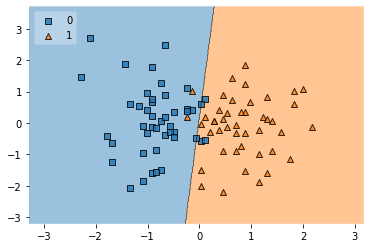

In [177]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [189]:
import pickle

In [190]:
pickle.dump(clf,open('model.pkl','wb'))